In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter

import analyze_control as ac
import central_system as cs

import exp_study_case

Importing Jupyter notebook from exp_study_case.ipynb


# システムの仕様

本モジュールではシステムの仕様の取得について示します。  
本来システムの仕様は入力値ですが、一部の値はデフォルト値を使用できるためその計算方法を示します。  

## 0. 検討ケースの取得

In [2]:
case = exp_study_case.get_case()
hday, cday = exp_study_case.get_display_day()

In [3]:
case['system']

{'default_heat_source_spec': True,
 'v_hs_rtd_h': 1800.0,
 'v_hs_rtd_c': 1800.0,
 'is_duct_insulated': True,
 'vav_system': False,
 'cap_rtd_h': None,
 'cap_rtd_c': None}

## 1. 定格能力および定格消費電力

定格暖房能力 $q_{rtd,H}$、定格冷房能力 $q_{rtd,C}$、定格暖房消費電力 $P_{rtd,H}$ 及び定格冷房消費電力 $P_{rtd,C}$ は、JIS B8615-2に規定された測定方法によるか、床面積の合計 $A_A$ に応じて以下に示す方法によるものとする。  

### デフォルト値を使用する場合の定格能力の推定

$$q_{rtd,H} = q_{rq,H} A_A f_{CT} f_{CL} $$

$$q_{rtd,C} = q_{rq,C} A_A f_{CT} f_{CL} $$

$q_{crtd,H}$：定格暖房能力, W  
$q_{rtd,C}$：定格冷房能力, W  
$q_{rq,H}$：単位面積当たりの必要暖房能力, W/m<sup>2</sup>  
$q_{rq,C}$：単位面積当たりの必要冷房能力, W/m<sup>2</sup>  
$A_A$：床面積の合計, m<sup>2</sup>  
$f_{CT}$：外気温度能力補正係数  
$f_{CL}$：間歇運転能力補正係数  

単位面積当たりの必要暖房能力 $q_{rq,H}$ 及び単位面積当たりの必要冷房能力 $q_{rq,C}$ は、地域区分ごとに下表により定める。外気温度能力補正係数 $f_{CT}$ は、1.05の値とする。間歇運転能力補正係数 $f_{CL}$ は、1.0とする。

| 単位面積当たりの必要能力 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 単位面積当たりの必要暖房能力 | 73.91 | 64.32 | 62.65 | 66.99 | 72.64 | 61.34 | 64.55 | - |
| 単位面積当たりの必要冷房能力 | 37.61 | 36.55 | 42.34 | 54.08 | 61.69 | 60.79 | 72.53 | 61.56 |

In [4]:
if case['system']['default_heat_source_spec']:
    q_rtd_h, q_rtd_c = cs.get_rated_capacity(case['region'], case['house']['a_a'])
else:
    q_rtd_h, q_rtd_c = case['system']['cap_rtd_h'], case['system']['cap_rtd_c']

(q_rtd_h, q_rtd_c)

(7733.9925600000015, 7664.646360000001)

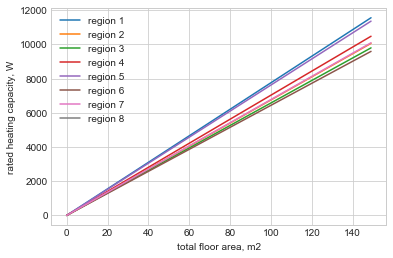

In [5]:
xs = np.arange(150)

plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.subplots()

ax.plot(xs, [cs.get_rated_capacity(1, x)[0] for x in xs], label='region 1')
ax.plot(xs, [cs.get_rated_capacity(2, x)[0] for x in xs], label='region 2')
ax.plot(xs, [cs.get_rated_capacity(3, x)[0] for x in xs], label='region 3')
ax.plot(xs, [cs.get_rated_capacity(4, x)[0] for x in xs], label='region 4')
ax.plot(xs, [cs.get_rated_capacity(5, x)[0] for x in xs], label='region 5')
ax.plot(xs, [cs.get_rated_capacity(6, x)[0] for x in xs], label='region 6')
ax.plot(xs, [cs.get_rated_capacity(7, x)[0] for x in xs], label='region 7')
ax.plot(xs, [cs.get_rated_capacity(8, x)[0] for x in xs], label='region 8')

ax.set_xlabel('total floor area, m2')
ax.set_ylabel('rated heating capacity, W')

plt.legend()
plt.show()

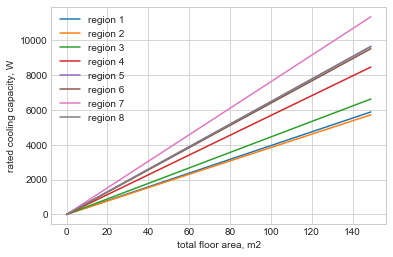

In [6]:
xs = np.arange(150)

plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.subplots()

ax.plot(xs, [cs.get_rated_capacity(1, x)[1] for x in xs], label='region 1')
ax.plot(xs, [cs.get_rated_capacity(2, x)[1] for x in xs], label='region 2')
ax.plot(xs, [cs.get_rated_capacity(3, x)[1] for x in xs], label='region 3')
ax.plot(xs, [cs.get_rated_capacity(4, x)[1] for x in xs], label='region 4')
ax.plot(xs, [cs.get_rated_capacity(5, x)[1] for x in xs], label='region 5')
ax.plot(xs, [cs.get_rated_capacity(6, x)[1] for x in xs], label='region 6')
ax.plot(xs, [cs.get_rated_capacity(7, x)[1] for x in xs], label='region 7')
ax.plot(xs, [cs.get_rated_capacity(8, x)[1] for x in xs], label='region 8')

ax.set_xlabel('total floor area, m2')
ax.set_ylabel('rated cooling capacity, W')

plt.legend()
plt.show()

## 2. 定格風量 

熱源機の暖房時の定格風量及び熱源機の冷房時の定格風量は...  

## 3. ダクトの断熱の有無

以下の条件を満たす場合、ダクトの断熱は有りとする。満たさない場合、ダクトの断熱は無しとする。

- ダクトの設置位置が断熱区画内であること
- ダクトの設置位置にかかわらず、線熱損失係数が 0.49 W/mK 以下であること

ここで、線熱損失係数（ダクト内外の温度差1℃、ダクト1mあたりの熱損失量）は、次式により表される。

$$ U_{DL} = \frac{ \pi}{ \frac{ R_i }{ l_i } + \frac{ 1 }{ 2 \lambda } \times \log_e  \frac{ l_o }{ l_i } + \frac{ R_o }{ l_o } } $$

ここで、  
$U_{DL}$：断熱区画外のダクトの線熱損失係数, W/mK  
$l_o$：断熱区画外のダクトの外径（直径）, m  
$l_i$：断熱区画外のダクトの断熱材の内径（直径）, m  
$R_o$：断熱区画外のダクトの外表面熱伝達抵抗, m<sup>2</sup>K/W  
$R_i$：断熱区画外のダクトの内表面熱伝達抵抗, m<sup>2</sup>K/W  
$\lambda$：断熱区画外のダクトの断熱材の熱伝導率, W/mK  
である。断熱区画外のダクトの内表面熱伝達抵抗$R_i$は0とする。断熱区画外のダクトの外表面熱伝達抵抗$R_o$は、0.0862（m<sup>2</sup>K/W）とする。断熱区画外のダクトの断熱材の熱伝導率$\lambda$は断熱材の種類に応じて第三章第二節で定める値とすること。ダクトが角型ダクトの場合、断熱区画外のダクトの外径（直径）$l_o$及び断熱区画外のダクトの断熱材の内径（直径）$l_i$は次式で換算して適用する。

$$ l_o = \frac{ L_{so} }{ \pi } $$
$$ l_i = \frac{ L_{si} }{ \pi } $$

ここで、  
$L_{so}$：角型ダクトの外周長, m  
$L_{si}$：角型ダクトの断熱材の内周長, m  
である。


## 4. VAV システム

VAVシステムの有無は...  

## 5. 外部モジュールへの引き渡し

本モジュールを外部のモジュールから呼び出して必要な値を取得する場合に利用する関数を定義します。

In [7]:
def get_system_spec(region, a_a, system_spec):
    
    if system_spec['default_heat_source_spec']:
        q_rtd_h, q_rtd_c = cs.get_rated_capacity(region, a_a)
    else:
        q_rtd_h, q_rtd_c = system_spec['cap_rtd_h'], system_spec['cap_rtd_c']
    
    v_hs_rtd_h = system_spec['v_hs_rtd_h']
    v_hs_rtd_c = system_spec['v_hs_rtd_c']
    is_duct_insulated = system_spec['is_duct_insulated']
    vav_system = system_spec['vav_system']
    
    return q_rtd_h, q_rtd_c, v_hs_rtd_h, v_hs_rtd_c, is_duct_insulated, vav_system